In [1]:
import numpy as np
import pandas as pd
data = pd.read_excel('3span-beams-MOM.xlsx')
print(data.shape)
data=data.dropna()
print(data.shape)

(61265, 98)
(61265, 98)


In [2]:
shape=data.shape
N=shape[0]

inp=np.zeros((N,7,1))
LPF = np.zeros((N,1))
Y = np.zeros((N,31))


for ii in range(0,N):
    
    P1= int(data.iloc[ii,0])
    P2= int(data.iloc[ii,1])
    P3= int(data.iloc[ii,2])
    
    L1= int(data.iloc[ii,4])
    L2= int(data.iloc[ii,5])
    L3= int(data.iloc[ii,6])
    
    inp[ii,0,0] = (P1*data.iloc[ii][3]+P1*0.001)*0.01
    inp[ii,1,0] = (P2*data.iloc[ii][3]+P2*0.001)*0.01
    inp[ii,2,0] = (P3*data.iloc[ii][3]+P3*0.001)*0.01
    
    inp[ii,3,0] = L1
    inp[ii,4,0] = L2
    inp[ii,5,0] = L3
    
    LPF[ii,0]= data.iloc[ii][3]
    
    pos = data.iloc[ii,7]
    if pos=="meio":
        inp[ii,6,0] = 0
    elif pos=="ponta":
        inp[ii,6,0] = 1

    
    
    Y[ii,:] = data.iloc[ii][[8,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,97]]


    




In [3]:
for i in range(10):
    print(inp[i,:,0])

[16.26557525  8.13278763  8.13278763  1.          7.          4.
  1.        ]
[ 7.26551719  3.6327586  14.53103438  5.          9.          6.
  1.        ]
[22.71126649 22.71126649 22.71126649  1.          4.          3.
  0.        ]
[ 3.23752836  3.23752836  1.61876418  3.         10.          9.
  1.        ]
[7.03233033 3.49794669 7.03233033 7.         2.         6.
 0.        ]
[4.07349939 4.07349939 2.0367497  9.         2.         8.
 1.        ]
[ 1.33263378  2.66526756  2.66526756  2.         10.          8.
  1.        ]
[22.37965288 44.75930575 44.75930575  1.          3.          1.
  1.        ]
[ 7.74863102  7.74863102 15.49726204  9.         10.          4.
  1.        ]
[ 7.39830035 14.7966007   7.39830035  5.          7.          2.
  0.        ]


In [4]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

inputA = krs.Input(shape=(7,))

z = Dense(512, activation="relu")(inputA)
z = Dense(256, activation="relu")(z)
z = Dense(128, activation="relu")(z)
z = Dense(64, activation="relu")(z)
z = Dense(32, activation="relu")(z)
z = Dense(31, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
NN_SK_model = krs.Model(inputs=inputA, outputs=z)
NN_SK_model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


NN_SK_history = NN_SK_model.fit( inp[:,:,0], Y, validation_data=(inp[:,:,0], Y),
                        epochs=100, batch_size=32, verbose=1)  
    
#NN_SK_model.save('3-spanMOM-LPF-model.h5')
plt.figure()
# Plot training & validation loss values
plt.plot(NN_SK_history.history['loss'],label = 'SK')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1







Train on 61265 samples, validate on 61265 samples
Epoch 1/100
61265/61265 [==============================] - 6s 106us/step - loss: 286644.8626 - val_loss: 104604.6451
Epoch 2/100
61265/61265 [==============================] - 6s 101us/step - loss: 87638.6058 - val_loss: 79251.8913
Epoch 3/100
61265/61265 [==============================] - 6s 93us/step - loss: 68832.1237 - val_loss: 66626.9064
Epoch 4/100
61265/61265 [==============================] - 6s 94us/step - loss: 60801.4953 - val_loss: 54403.0060
Epoch 5/100
61265/61265 [==============================] - 6s 97us/step - loss: 55366.0597 - val_loss: 51640.8876
Epoch 6/100
61265/61265 [==============================] - 6s 96us/step - loss: 50009.8987 - val_loss: 46868.3310
Epoch 7/100
61265/61265 [==============================] - 6s 101us/step - loss: 44359.1805 - val_loss: 40722.0399
Epoch 8/100
61265/61265 [==============================] - 6s 93us/step - loss: 39584.1068 - val_loss: 39177.4545
Epoch 9/100
61265/61265 [==

61265/61265 [==============================] - 7s 119us/step - loss: 20150.9441 - val_loss: 19011.1793
Epoch 61/100
61265/61265 [==============================] - 7s 119us/step - loss: 19925.5607 - val_loss: 19776.7264
Epoch 62/100
61265/61265 [==============================] - 7s 119us/step - loss: 19875.8669 - val_loss: 19601.5061
Epoch 63/100
61265/61265 [==============================] - 7s 117us/step - loss: 19879.2010 - val_loss: 20057.4583
Epoch 64/100
61265/61265 [==============================] - 7s 118us/step - loss: 19753.7125 - val_loss: 20597.0559
Epoch 65/100
61265/61265 [==============================] - 7s 119us/step - loss: 19744.7072 - val_loss: 19265.6504
Epoch 66/100
61265/61265 [==============================] - 7s 120us/step - loss: 19704.8368 - val_loss: 18801.4102
Epoch 67/100
61265/61265 [==============================] - 8s 125us/step - loss: 19591.3197 - val_loss: 19452.4055
Epoch 68/100
61265/61265 [==============================] - 8s 126us/step - loss: 194

<Figure size 640x480 with 1 Axes>

In [5]:
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [6]:
  y_pred1 = NN_SK_model.predict([inp[:,:,0]])

2.0 9.0 6.0


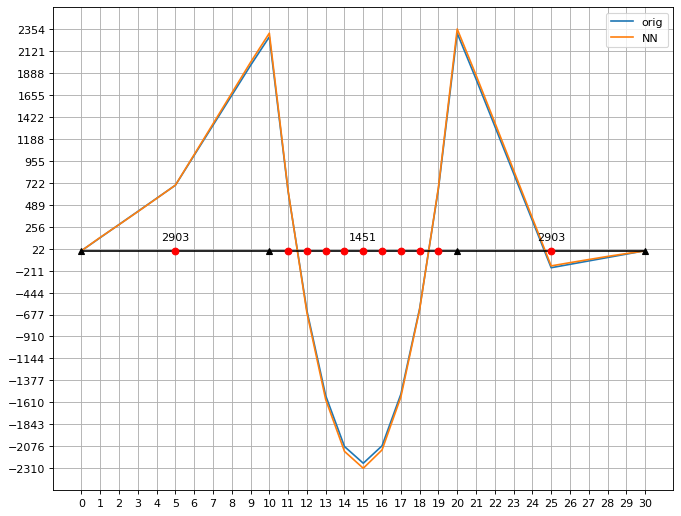

6.0 3.0 4.0


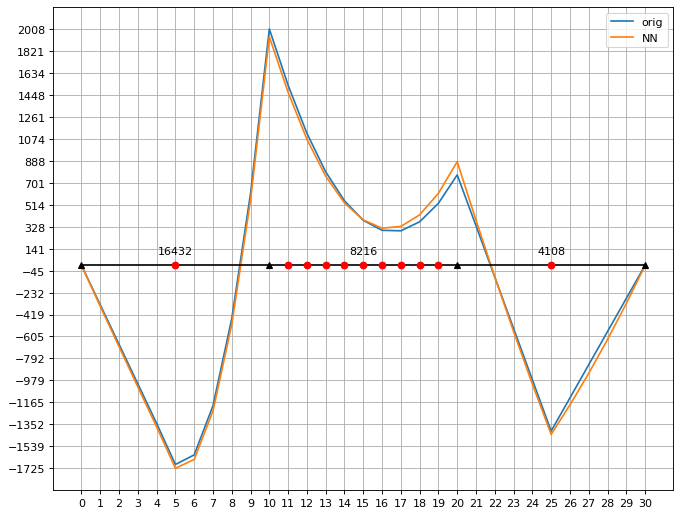

8.0 7.0 3.0


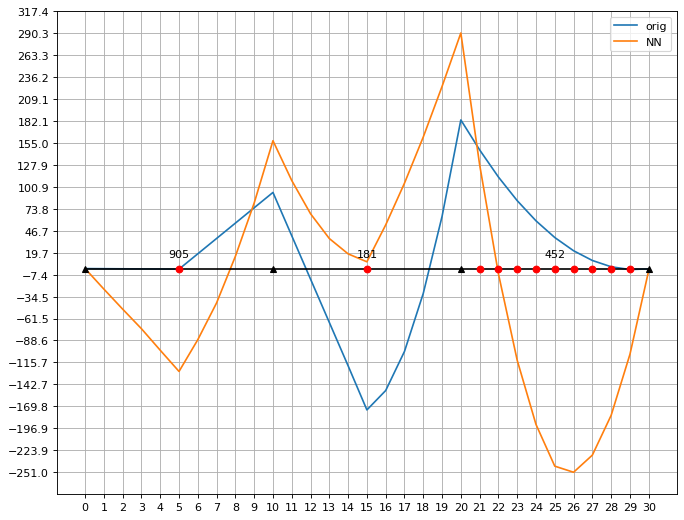

8.0 3.0 9.0


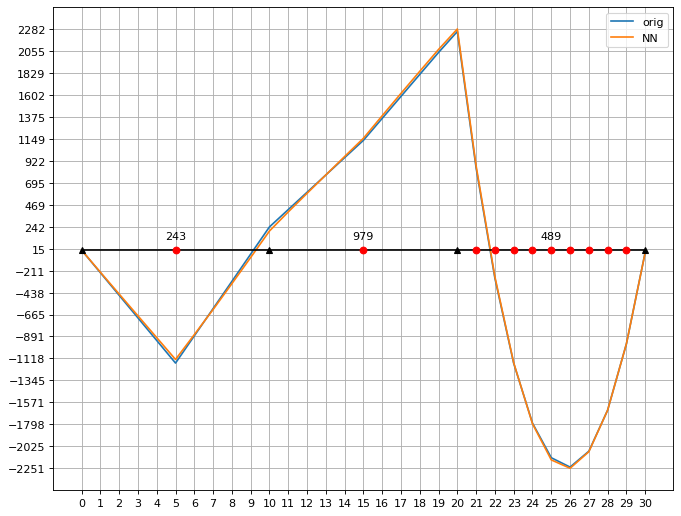

8.0 3.0 4.0


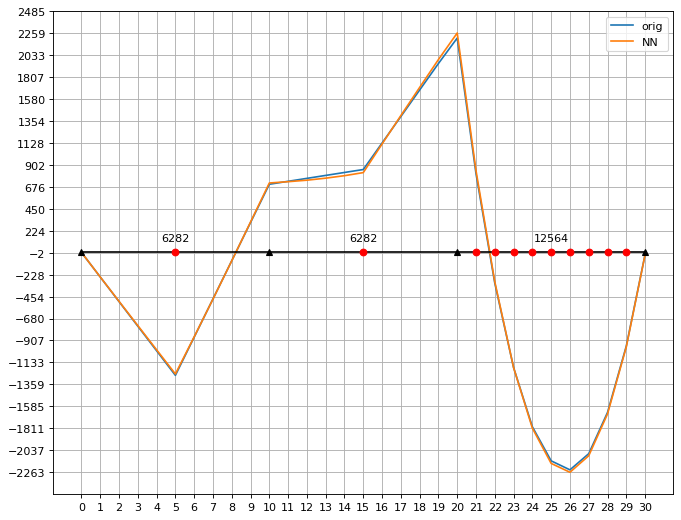

1.0 7.0 1.0


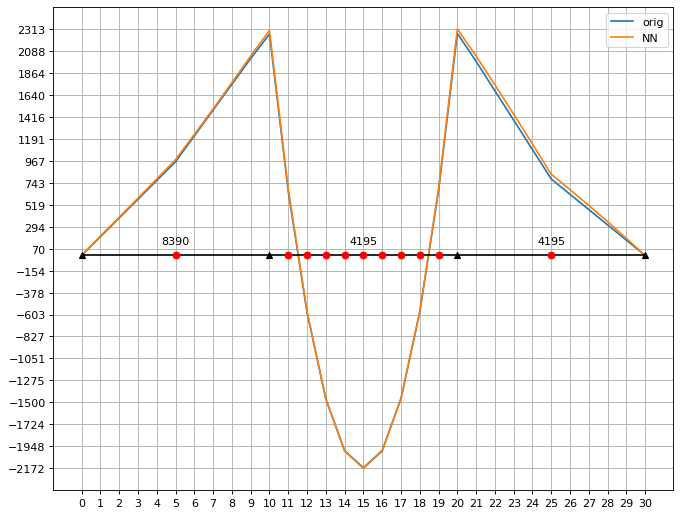

10.0 9.0 4.0


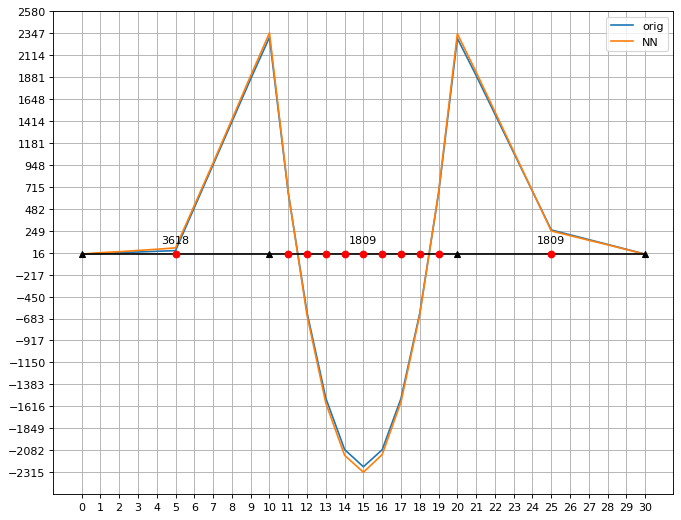

3.0 10.0 2.0


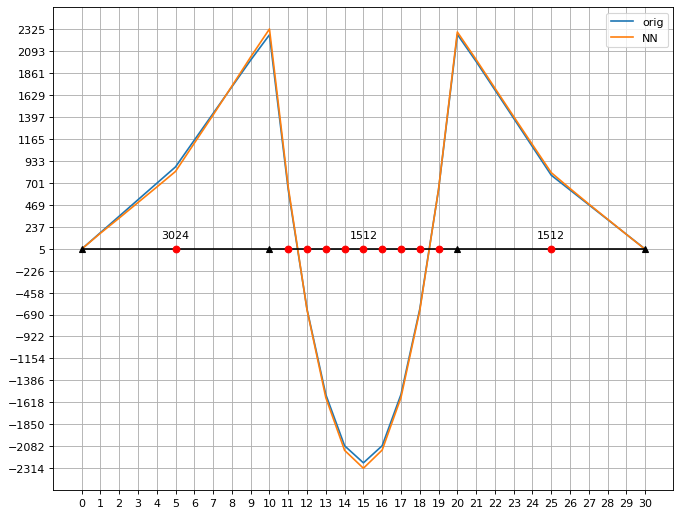

6.0 1.0 8.0


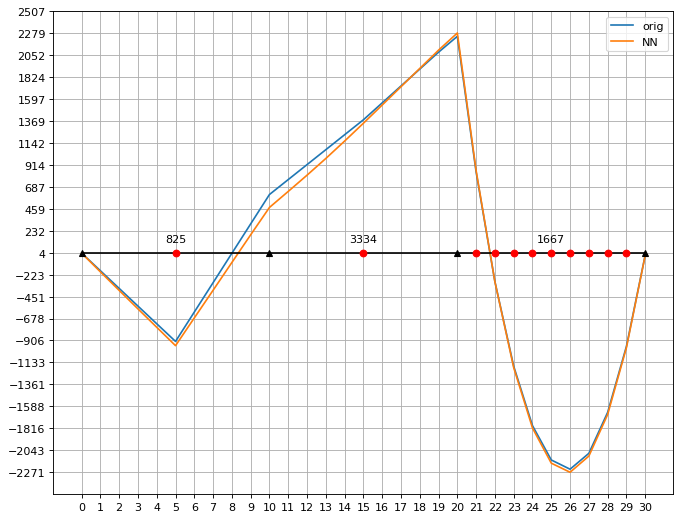

2.0 5.0 10.0


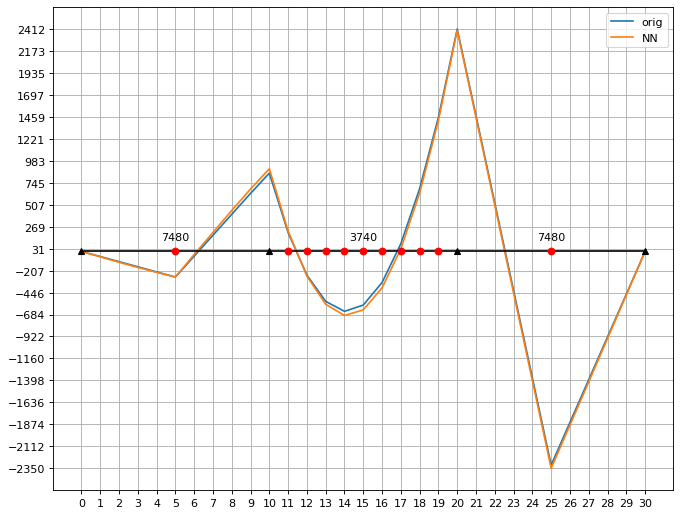

In [7]:
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
for ii in [345,54354,54323,543,34534,765,7653,4326,1243,6433]:
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    
  
    
    print(inp[ii,3,0],inp[ii,4,0],inp[ii,5,0])
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,10,20,30],[0,0,0,0],'^k')
    if inp[ii,6,0]:
        loads=[5,15,21,22,23,24,25,26,27,28,29]
        dots=[25,5,15]
    else:
        loads=[5,11,12,13,14,15,16,17,18,19,25]
        dots=[15,5,25]
    plt.plot(loads,[0,0,0,0,0,0,0,0,0,0,0],'ro')
    
    for i in range(3):
        plt.annotate(int(inp[ii,i,0]*100*LPF[ii,0]), # this is the text
        (dots[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center
    
        
    stepd=(maximo-minimo)/20.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()